# Google Colab Setup 

Please run the code below to mount drive if you are running on colab.

Please ignore if you are running on your local machine.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd /content/drive/MyDrive/MiniGPT/

# Language Modeling and Transformers

The project will consist of two broad parts. 

1. **Baseline Generative Language Model**: We will train a simple Bigram language model on the text data. We will use this model to generate a mini story. 
2. **Implementing Mini GPT**: We will implement a mini version of the GPT model layer by layer and attempt to train it on the text data. You will then load pretrained weights provided and generate a mini story. 

## Some general instructions 

1. Please keep the name of layers consistent with what is requested in the `model.py` file for each layer, this helps us test in each function independently. 
2. Please check to see if the bias is to be set to false or true for all linear layers (it is mentioned in the doc string)
3. As a general rule please read the docstring well, it contains information you will need to write the code. 
4. All configs are defined in `config.py` for the first part. While you are writing the code, do not change the values in the config file since we use them to test. Once you have passed all the tests please feel free to vary the parameter as you please.
5. You will need to fill in `train.py` and run it to train the model. If you are running into memory issues please feel free to change the `batch_size` in the `config.py` file. If you are working on Colab please make sure to use the GPU runtime and feel free to copy over the training code to the notebook. 

In [3]:
!pip install numpy torch tiktoken wandb einops # Install all required packages

ERROR: Invalid requirement: '#'


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import torch
import tiktoken

In [6]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.is_available())


2.5.1
12.1
90100
True


In [7]:
from model import BigramLanguageModel, SingleHeadAttention, MultiHeadAttention, FeedForwardLayer, LayerNorm, TransformerLayer, MiniGPT
from config import BigramConfig, MiniGPTConfig
import tests

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [9]:
# If not provided, download from https://drive.google.com/file/d/1g09qUM9WibdfQVgkj6IAj8K2S3SGwc91/view?usp=sharing
path_to_bigram_tester = "./pretrained_models/bigram_tester.pt" # Load the bigram model with name bigram_tester.pt
path_to_gpt_tester = "./pretrained_models/minigpt_tester.pt" # Load the gpt model with name minigpt_tester.pt

##  Bigram Language Model (10 points)

A bigram language model is a type of probabilistic language model that predicts a word given the previous word in the sequence. The model is trained on a text corpus and learns the probability of a word given the previous word.



### Implement the Bigram model (5 points)

Please complete the `BigramLanguageModel` class in model.py. We will model a Bigram language model using a simple MLP with one hidden layer. The model will take in the previous word index and output the logits over the vocabulary for the next word.

In [10]:
# Test implementation for Bigram Language Model
model = BigramLanguageModel(BigramConfig)
tests.check_bigram(model, path_to_bigram_tester, device)

c:\UCLA\239_DeepLearning2\Project3\Project3_skeleton\tests.py:375: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(checkpoint_file, map_location=device)


'TEST CASE PASSED!!!'

### Training the Bigram Language Model (2.5 points)

Complete the code in `train.py` to train the Bigram language model on the text data. Please provide plots for both the training and validation in the cell below.

Some notes on the training process:

1. You should be able to train the model slowly on your local machine.
2. Training it on Colab will help with speed.
3.  <span style="color:red">To get full points for this section it is sufficient to show that the loss is decreasing over time</span>. You should see it saturate to a value close to around 5-6 but as long as you see it decreasing then saturating you should be good.
4. Please log the loss curves either on wandb, tensorboard or any other logger of your choice and please attach them below.

In [11]:
from train import solver

In [12]:
solver(model_name="bigram")

number of trainable parameters: 3.27M


wandb: Currently logged in as: lyuchenandy (lyuchenandy-ucla) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Iteration 0, Train Loss: 10.8250 Eval Loss: 10.8252
Iteration 1000, Train Loss: 10.2411 Eval Loss: 10.2506
Iteration 2000, Train Loss: 9.1736 Eval Loss: 8.9498
Iteration 3000, Train Loss: 8.2684 Eval Loss: 7.8110
Iteration 4000, Train Loss: 7.4470 Eval Loss: 7.1374
Iteration 5000, Train Loss: 7.5873 Eval Loss: 6.7797
Iteration 6000, Train Loss: 7.1636 Eval Loss: 6.5528
Iteration 7000, Train Loss: 6.7754 Eval Loss: 6.3833
Iteration 8000, Train Loss: 6.4607 Eval Loss: 6.2495
Iteration 9000, Train Loss: 7.0114 Eval Loss: 6.1298
Iteration 10000, Train Loss: 6.8780 Eval Loss: 6.0170
Iteration 11000, Train Loss: 6.8777 Eval Loss: 5.9122
Iteration 12000, Train Loss: 6.6049 Eval Loss: 5.8133
Iteration 13000, Train Loss: 6.5302 Eval Loss: 5.7134
Iteration 14000, Train Loss: 6.2312 Eval Loss: 5.6170
Iteration 15000, Train Loss: 5.9984 Eval Loss: 5.5176
Iteration 16000, Train Loss: 6.1539 Eval Loss: 5.4235
Iteration 17000, Train Loss: 5.8295 Eval Loss: 5.3291
Iteration 18000, Train Loss: 5.8983 E

### Train and Valid Plots

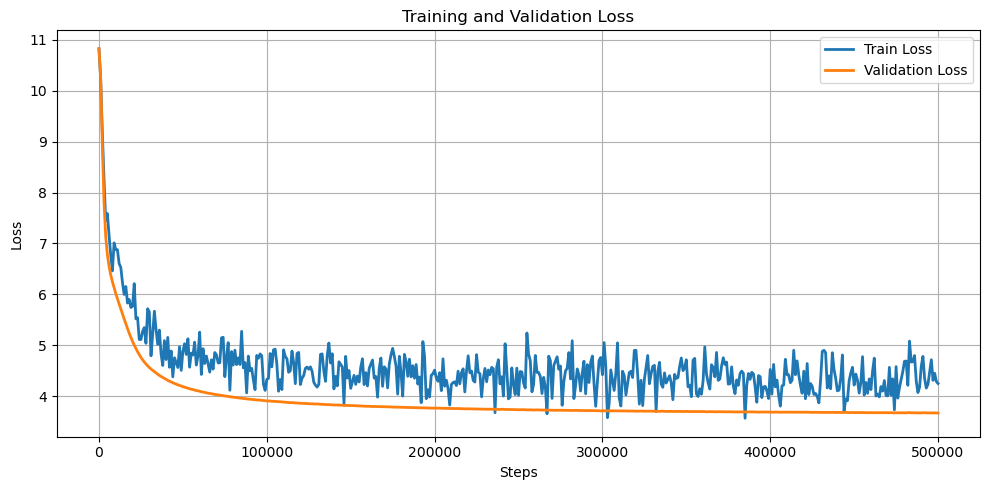

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_curves(train_loss_path, eval_loss_path, log_interval=100, save_path=None):
    """
    Plots training and validation loss curves from exported CSV files.
    """

    train_df = pd.read_csv(train_loss_path)
    eval_df = pd.read_csv(eval_loss_path)

    train_steps = train_df["Step"] * log_interval
    eval_steps = eval_df["Step"] * log_interval

    train_loss = train_df.iloc[:, 1].astype(float)
    eval_loss = eval_df.iloc[:, 1].astype(float)
    
    plt.figure(figsize=(10, 5))
    plt.plot(train_steps, train_loss, label="Train Loss", linewidth=2)
    plt.plot(eval_steps, eval_loss, label="Validation Loss", linewidth=2)
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"Plot saved to {save_path}")
    else:
        plt.show()

train_loss_path = "models/bigram/wandb_export_Bigram_train.csv"
eval_loss_path = "models/bigram/wandb_export_Bigram_eval.csv"
plot_loss_curves(train_loss_path, eval_loss_path, 1000)

### Generation (2.5 points)

Complete the code in the `generate` method of the Bigram class and generate a mini story using the trained Bigram language model. The model will take in the previous word index and output the next word index.

Start with the following seed sentence: 
    
    `"once upon a time"`
    

In [13]:
# TODO: Specify the path to your trained model
model_path = "models/bigram/best_model.pt"
model = BigramLanguageModel(BigramConfig)
tokenizer = tiktoken.get_encoding("gpt2")
model.load_state_dict(torch.load(model_path)["model_state_dict"])

C:\Users\lyuch\AppData\Local\Temp\ipykernel_46028\1940206365.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)["model_state_di

<All keys matched successfully>

In [14]:
model.to(device)
gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent))
print("Generating text starting with:", gen_tokens.shape)
gen_tokens = gen_tokens.to(device)
model.eval()
print(
    tokenizer.decode(
        model.generate(gen_tokens, max_new_tokens=200).squeeze().tolist()
    )
)

Generating text starting with: torch.Size([4])
Once upon a time, Lily runs away from the newspaper and design new diary for bed with his friend tried to make a piece of leaves to her stuck in a lady took Snowy mean and used her new flowers and have fun in the boat could be safe." So, you, strong. Inside, Mike as new toy sadly byies. cream, it, and their animals. Anna and found a loud noise. He did not like one our meeting some surprise for his wing.Tim was a ride his mom Tim was ashamed again.Once upon a cat hug on, "Hi, she stopped size and get his fruits and made sure they stayed together. One day and point busy. Lily. You should be too. They run and her." The bird was no asks. The mother's play and a little bunny felt bad girl named Max looked for his head. Lily.Once upon a hole and said. Mittens.Tom looked at all! Let me fall asleep were very hole. From that Lily says. A


### Observation and Analysis

Please answer the following questions. 

1. What can we say about the generated text in terms of grammar and coherence? 
2. What are the limitations of the Bigram language model?
3. If the model is scaled with more parameters do you expect the bigram model to get substantially better? Why or why not?

1. The generated text consists mainly of syntactically broken phrases and lacks semantic flow and logical consistency.
2. The context length of one token dictates that bigram language model cannot take into account global grammatical and semantic structures and generate high-quality sentences.
3. No, its performance is limited to generation based on one-token context.

## Mini GPT (90 points)

We will implement a decoder style transformer model like we discussed in lecture, which is a scaled down version of the [GPT model](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf). 

All the model components follow directly from the original [Attention is All You Need](https://arxiv.org/abs/1706.03762) paper. The only difference is we will use prenormalization and learnt positional embeddings instead of fixed ones.

We will now implement each layer step by step checking if it is implemented correctly in the process. We will finally put together all our layers to get a fully fledged GPT model. 

<span style="color:red">Later layers might depend on previous layers so please make sure to check the previous layers before moving on to the next one.</span>

### Single Head Causal Attention (20 points)

We will first implement the single head causal attention layer. This layer is the same as the scaled dot product attention layer but with a causal mask to prevent the model from looking into the future.

Recall that Each head has a Key, Query and Value Matrix and the scaled dot product attention is calculated as : 

\begin{equation}
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
\end{equation}

where $d_k$ is the dimension of the key matrix.

Figure below from the original paper shows how the layer is to be implemented.

![image](./Images/Single_Head.png)

Image credits: [Attention is All You Need Paper](https://arxiv.org/abs/1706.03762)

Please complete the `SingleHeadAttention` class in `model.py`

In [10]:
model = SingleHeadAttention(MiniGPTConfig.embed_dim, MiniGPTConfig.embed_dim//4, MiniGPTConfig.embed_dim//4) # configs are set as such for testing do not modify
tests.check_singleheadattention(model, path_to_gpt_tester, device)

c:\UCLA\239_DeepLearning2\Project3\Project3_skeleton\tests.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(checkpoint_file, map_location=device)


'TEST CASE PASSED!!!'

### Multi Head Attention (10 points)

Now that we have a single head working, we will now scale this across multiple heads, remember that with multihead attention we compute perform head number of parallel attention operations. We then concatenate the outputs of these parallel attention operations and project them back to the desired dimension using an output linear layer.

Figure below from the original paper shows how the layer is to be implemented.

![image](./Images/MultiHead.png)

Image credits: [Attention is All You Need Paper](https://arxiv.org/abs/1706.03762)

Please complete the `MultiHeadAttention` class in `model.py` using the `SingleHeadAttention` class implemented earlier. 

In [11]:
model = MultiHeadAttention(MiniGPTConfig.embed_dim, MiniGPTConfig.num_heads)
tests.check_multiheadattention(model, path_to_gpt_tester, device)

c:\UCLA\239_DeepLearning2\Project3\Project3_skeleton\tests.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(checkpoint_file, map_location=device)


'TEST CASE PASSED!!!'

### Feed Forward Layer (5 points)

As discussed in lecture, the attention layer is completely linear, in order to add some non-linearity we add a feed forward layer. The feed forward layer is a simple two layer MLP with a GeLU activation in between.

Please complete the `FeedForwardLayer` class in `model.py`

In [12]:
model = FeedForwardLayer(MiniGPTConfig.embed_dim)
tests.check_feedforward(model, path_to_gpt_tester, device)

c:\UCLA\239_DeepLearning2\Project3\Project3_skeleton\tests.py:160: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(checkpoint_file, map_location=device)


'TEST CASE PASSED!!!'

### LayerNorm (10 points)

We will now implement the layer normalization layer. Layernorm is used across the model to normalize the activations of the previous layer. Recall that the equation for layernorm is given as:

\begin{equation}

\text{LayerNorm}(x) = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} \odot \gamma + \beta

\end{equation}

With the learnable parameters $\gamma$ and $\beta$. 

Remember that unlike batchnorm we compute statistics across the feature dimension and not the batch dimension, hence we do not need to keep track of running averages.

Please complete the `LayerNorm` class in `model.py`

In [13]:
model = LayerNorm(MiniGPTConfig.embed_dim)
tests.check_layernorm(model, path_to_gpt_tester, device)

c:\UCLA\239_DeepLearning2\Project3\Project3_skeleton\tests.py:196: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(checkpoint_file, map_location=device)


'TEST CASE PASSED!!!'

### Transformer Layer (15 points)

We have now implemented all the components of the transformer layer. We will now put it all together to create a transformer layer. The transformer layer consists of a multi head attention layer, a feed forward layer and two layer norm layers.

Please use the following order for each component (Varies slightly from the original attention paper):
1. LayerNorm
2. MultiHeadAttention
3. LayerNorm
4. FeedForwardLayer

Remember that the transformer layer also has residual connections around each sublayer.

The below figure shows the structure of the transformer layer you are required to implement.

![prenorm_transformer](./Images/Prenorm.png)

Image Credit : [CogView](https://arxiv.org/pdf/2105.13290)

Implement the `TransformerLayer` class in `model.py`

In [14]:
model =  TransformerLayer(MiniGPTConfig.embed_dim, MiniGPTConfig.num_heads)
tests.check_transformer(model, path_to_gpt_tester, device)

c:\UCLA\239_DeepLearning2\Project3\Project3_skeleton\tests.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(checkpoint_file, map_location="cpu")


'TEST CASE PASSED!!!'

### Putting it all together : MiniGPT (15 points)

We are now ready to put all our layers together to build our own MiniGPT! 

The MiniGPT model consists of an embedding layer, a positional encoding layer and a stack of transformer layers. The output of the transformer layer is passed through a linear layer (called head) to get the final output logits. Note that in our implementation we will use [weight tying](https://arxiv.org/abs/1608.05859) between the embedding layer and the final linear layer. This allows us to save on parameters and also helps in training.

Implement the `MiniGPT` class in `model.py`

In [15]:
model = MiniGPT(MiniGPTConfig)
tests.check_miniGPT(model, path_to_gpt_tester, device)

c:\UCLA\239_DeepLearning2\Project3\Project3_skeleton\tests.py:222: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(checkpoint_file, map_location=device)


'TEST CASE PASSED!!!'

### Attempt at training the model (5 points)

We will now attempt to train the model on the text data. We will use the same text data as before. If needed, you can scale down the model parameters in the config file to a smaller value to make training feasible. 

Use the same training script we built for the Bigram model to train the MiniGPT model. If you implemented it correctly it should work just out of the box!

**NOTE** : We will not be able to train the model to completion in this assignment. Unfortunately, without access to a relatively powerful GPU, training a large enough model to see good generation is not feasible. However, you should be able to see the loss decreasing over time. <span style="color:red">To get full points for this section it is sufficient to show that the loss is decreasing over time</span>. You do not need to run this for more than 5000 iterations or 1 hour of training.

In [10]:
from train import solver

In [ ]:
solver(model_name="minigpt")
# Multihead Attn - 7.2 iter/hr
# Parallelized Multihead Attn - 750 iter/hr

number of trainable parameters: 3.37M


wandb: Currently logged in as: lyuchenandy (lyuchenandy-ucla) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Iteration 0, Train Loss: 10.8279 Eval Loss: 10.8029
Iteration 100, Train Loss: 7.6714 Eval Loss: 7.7505
Iteration 200, Train Loss: 6.2209 Eval Loss: 6.1925
Iteration 300, Train Loss: 5.8830 Eval Loss: 5.9332
Iteration 400, Train Loss: 5.6771 Eval Loss: 5.7530
Iteration 500, Train Loss: 5.5775 Eval Loss: 5.5280
Iteration 600, Train Loss: 5.0712 Eval Loss: 5.3026
Iteration 700, Train Loss: 5.1411 Eval Loss: 5.1027
Iteration 800, Train Loss: 4.9632 Eval Loss: 4.9439
Iteration 900, Train Loss: 4.8608 Eval Loss: 4.8144
Iteration 1000, Train Loss: 4.7731 Eval Loss: 4.7211
Iteration 1100, Train Loss: 4.9623 Eval Loss: 4.6484
Iteration 1200, Train Loss: 4.4955 Eval Loss: 4.5960
Iteration 1300, Train Loss: 4.6311 Eval Loss: 4.5528
Iteration 1400, Train Loss: 4.7171 Eval Loss: 4.5251
Iteration 1500, Train Loss: 4.6932 Eval Loss: 4.5031
Iteration 1600, Train Loss: 4.3416 Eval Loss: 4.4868
Iteration 1700, Train Loss: 4.7082 Eval Loss: 4.4770
Iteration 1800, Train Loss: 4.6495 Eval Loss: 4.4743
Ite

### Train and Valid Plots

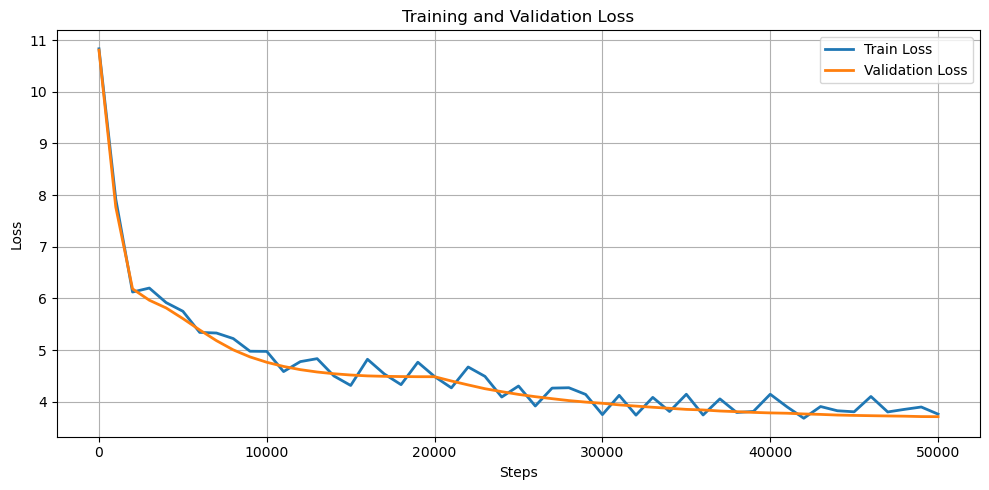

In [34]:
train_loss_path = "models/minigpt/wandb_export_2025-05-15_MiniGPT_base_train.csv"
eval_loss_path = "models/minigpt/wandb_export_2025-05-15_MiniGPT_base_eval.csv"

plot_loss_curves(train_loss_path, eval_loss_path, 1000)


### Generation (5 points)


Perform generation with the MiniGPT model that you trained. After that, copy over the generation function you used for the Bigram model and generate a mini story using the same seed sentence. 

    `"once upon a time"`

In [26]:
# TODO: Specify the path to your trained model
model_path = "models/minigpt/best_model.pt" # base implementation - 5000 iters
model_path = "models/minigpt/best_model_parrallel.pt" # trained using parallelized MHA - 32500 iters
model = MiniGPT(MiniGPTConfig(num_layers=2, parallelHeads=True))
tokenizer = tiktoken.get_encoding("gpt2")
model.load_state_dict(torch.load(model_path)["model_state_dict"])

C:\Users\lyuch\AppData\Local\Temp\ipykernel_26676\880734549.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)["model_state_dic

<All keys matched successfully>

In [27]:
model.to(device)
gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent))
print("Generating text starting with:", gen_tokens.shape)
gen_tokens = gen_tokens.to(device)
model.eval()
print(
    tokenizer.decode(
        model.generate(gen_tokens, max_new_tokens=200).squeeze().tolist()
    )
)

Generating text starting with: torch.Size([4])
Once upon a time, there was a elderly dog named Tim found a new hug. They played some fun days together.Once upon a time, there was a small brother, Johnny, "I'm sorry, too. They think even though right for what the lion use.
Roves were ruining them. He put on the tail. But his mom told them to say! I am so badly and now he said, "Do you want to touch him pick him up up and showed Bob back to how Timmy their toys because they found a nightmare. He wanted to count. Lily was safe and busy. Tim made good friends and spent eaten a big river. They learned that her lesson forgot about school puzzles. Timmy loved Whiskers. The dog and the dog. One day, Sammy heard a wish and lockedzo. Jack and Ben smiles. She says. "It is an important day.Once upon a time, there was a big weird man named Sue. Sam loved to paw. One day


Please answer the following questions. 

1. What can we say about the generated text in terms of grammar and coherence? 
2. If the model is scaled with more parameters do you expect the GPT model to get substantially better? Why or why not?




1. The grammatical sturcture are often valid for phrases and short sentences. But the text lacks semantic meaning across sentences.
2. Scaling up the model with more transformer layers, larger hidden sizes and more attention heads could improve the local coherence of generated text in a limited capacity. But substantial improvement is not expected given the simple architecture without an encoder and training scheme using a short context length.

### Scaling up the model (5 points)

To show that scale indeed will help the model learn we have trained a scaled up version of the model you just implemented. We will load the weights of this model and generate a mini story using the same seed sentence. Note that if you have implemented the model correctly just scaling the parameters and adding a few bells and whistles to the training script will results in a model like the one we will load now. 

In [11]:
from model import MiniGPT
from config import MiniGPTConfig

In [12]:
path_to_trained_model = "pretrained_models/best_train_loss_checkpoint.pth"

In [13]:
ckpt = torch.load(path_to_trained_model, map_location=device) # remove map location if using GPU

C:\Users\lyuch\AppData\Local\Temp\ipykernel_16940\2544158094.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(path_to_trained_model, map_location=device

In [14]:
# Set the configs for scaled model 
MiniGPTConfig.context_length = 512
MiniGPTConfig.embed_dim = 256
MiniGPTConfig.num_heads = 16
MiniGPTConfig.num_layers = 8

In [15]:
# Load model from checkpoint
model = MiniGPT(MiniGPTConfig)
model.load_state_dict(ckpt["model_state_dict"])

<All keys matched successfully>

In [16]:
tokenizer = tiktoken.get_encoding("gpt2")

In [19]:
model.to(device)
gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent))
print("Generating text starting with:", gen_tokens.shape)
gen_tokens = gen_tokens.to(device)
model.eval()
print(
    tokenizer.decode(
        model.generate(gen_tokens, max_new_tokens=200).squeeze().tolist()
    )
)

Generating text starting with: torch.Size([4])
Once upon a time, there was a little girl named Lily. She had a pretty dress and a hat. And that's how kind you prunes. And I can't talk like you. Come on, let's go home now." Other children joined in. They ran and jumped on best friends.Once upon a time, there was a baby who tried to relax and gaze at the flowers and make them beautiful.Once upon a time, there was an elderly man who lived on the other side of the park. They learned that it's important to be humble and kind to her friends. Lily felt proud of herself too. And she quietly got out and pecked at the carpet and laughed. Spot liked to play on the swings and the slide. They started running and bending. She felt like a real king, Amy, and her mom said it was time to end. The boy had done his homework and enjoyed his nap. From that day on, Lucy was very happy.
At the party, Mia


## Bonus (5 points)

The following are some open ended questions that you can attempt if you have time. Feel free to propose your own as well if you have an interesting idea. 

1. The model we have implemented is a decoder only model. Can you implement the encoder part as well? This should not be too hard to do since most of the layers are already implemented.
2. What are some improvements we can add to the training script to make training more efficient and faster? Can you concretely show that the improvements you made help in training the model better?
3. Can you implement a beam search decoder to generate the text instead of greedy decoding? Does this help in generating better text?
4. Can you further optimize the model architecture? For example, can you implement [Multi Query Attention](https://arxiv.org/abs/1911.02150) or [Grouped Query Attention](https://arxiv.org/pdf/2305.13245) to improve the model performance?

### Optimizing Multi-Head Self Attention (1.7× Speedup on local machine for `num_heads=4`)

In the standard `MultiHeadAttention` implementation, we loop over `H` attention heads and apply `SingleHeadAttention` **sequentially**—each operating on a projected subspace of dimension `head_dim`. While conceptually straightforward, this method is computationally inefficient due to redundant operations and lack of parallelism.

To address this, I implemented an optimized version, **`ParallelMHA`**, which computes multi-head attention **in parallel** using efficient tensor operations.


#### Notation

**B**: batch size  
**N**: context length  
**H**: number of heads  
**head_dim_kq**: `output_key_query_dim // H`  
**head_dim_v**: `output_value_dim // H`
Since output_key_query_dim = output_value_dim, **head_dim** = `key_query_val_dim // num_heads`


#### `ParallelMHA` class

1. **Unified Projection**  
   Project the input tensor `(B, N, input_dim)` into query, key, and value matrices using a single `Linear` layer:  
   Output shape: `(B, N, key_query_val_dim)`

2. **Reshape for Multi-Head**  
   Split the projected tensors across heads and reshape:  
   `q, k → (B, N, H, head_dim_kq)`  
   `v → (B, N, H, head_dim_v)`
   Transpose the tensor dimensions into: 
   `(B, H, N, head_dim_kq)`
   `(B, H, N, head_dim_v)`

3. **Efficient Attention Computation**  
   Compute attention scores via `q @ kᵀ`: `(B, H, N, N)` 
   Apply parallelized softmax over the last dimension, across the first two dimensions B and H. 

4. **Weighted Sum and Merge**  
   Compute attention output: `attn_probs @ v → (B, H, N, head_dim_v)`
   Transpose and reshape to combine heads:  
     Final shape: `(B, N, output_value_dim)`

This approach calculates the attention across each head simultaneously in one run.
- **Performance**: ~1.7× speedup on my RTX 4060 compared to default implementation
- **Configurable**:  
  `config.py` includes a `parallelHeads` flag to toggle between the default `MultiHeadAttention` and the optimized `ParallelMHA`.
